In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objects as go

# Basic Analysis
network size, degree distribution, assortativity, community detection


In [ ]:
#read file
G_java =  nx.drawing.nx_pydot.read_dot('/content/ns_project/Java_graph_new.dot')
G_r =  nx.drawing.nx_pydot.read_dot('/content/ns_project/R_graph.dot')
G_python =  nx.drawing.nx_pydot.read_dot('/content/ns_project/python_graph.dot')

In [ ]:
#use later in plot
network = {}
network['Java'] = G_java
network['R'] = G_r
network['Python'] = G_python

## network size

In [ ]:
# check size
def graph_size_table(graphs_dict):
    data = {
        'Nodes': [],
        'Edges': []
    }

    # Get statistics for each graph
    for name, G in graphs_dict.items():
        data['Nodes'].append(G.number_of_nodes())
        data['Edges'].append(G.number_of_edges())

    # Create DataFrame
    df = pd.DataFrame(data, index=['Java', 'R', 'Python'])

    return df

# Create the table
graphs = {
    'Java': G_java,
    'R': G_r,
    'Python': G_python
}

table = graph_size_table(graphs)
print(table)

        Nodes  Edges
Java     1538   8032
R        2471   5451
Python  26211  72081


## degree distribution

In [ ]:
# degree distribution
# not using log here to check nodes with 0 degree
def degree_distribution(G,language):
    in_degree_sequence = [d for n, d in G.in_degree()]
    out_degree_sequence = [d for n, d in G.out_degree()]

    avg_in_degree = np.mean(in_degree_sequence)
    avg_out_degree = np.mean(out_degree_sequence)
    plt.figure(figsize=(12, 5))

    # In-degree distribution
    plt.subplot(1, 2, 1)
    plt.hist(in_degree_sequence, bins=30, alpha=0.75)
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")
    plt.title(f"In-Degree Distribution of {language}")
    plt.text(0.95, 0.95, f"Avg In-Degree: {avg_in_degree:.2f}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')
    # Out-degree distribution
    plt.subplot(1, 2, 2)
    plt.hist(out_degree_sequence, bins=30, alpha=0.75)
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")
    plt.title(f"Out-Degree Distribution of {language}")
    plt.text(0.95, 0.95, f"Avg Out-Degree: {avg_out_degree:.2f}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.tight_layout()
    plt.show()


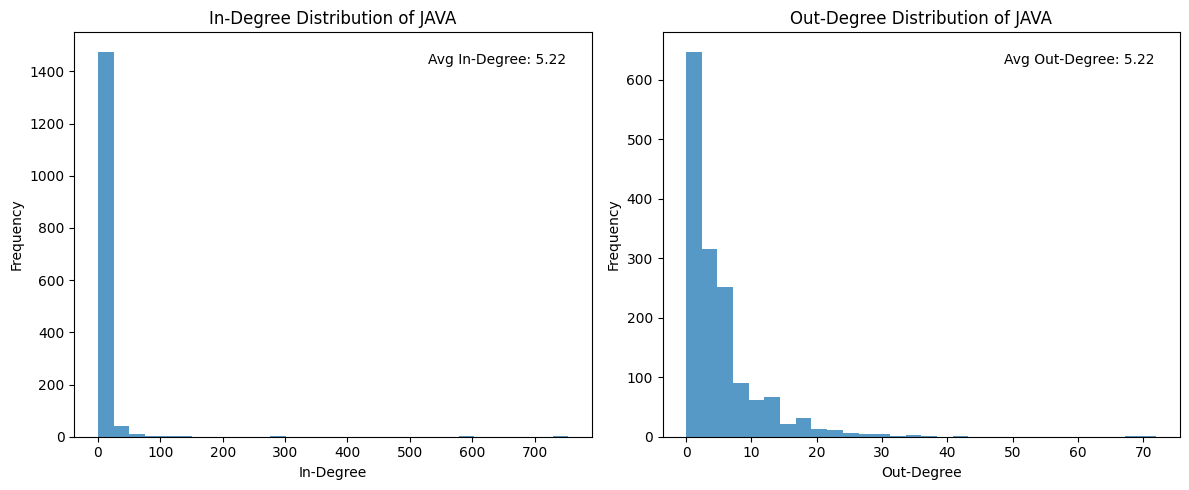

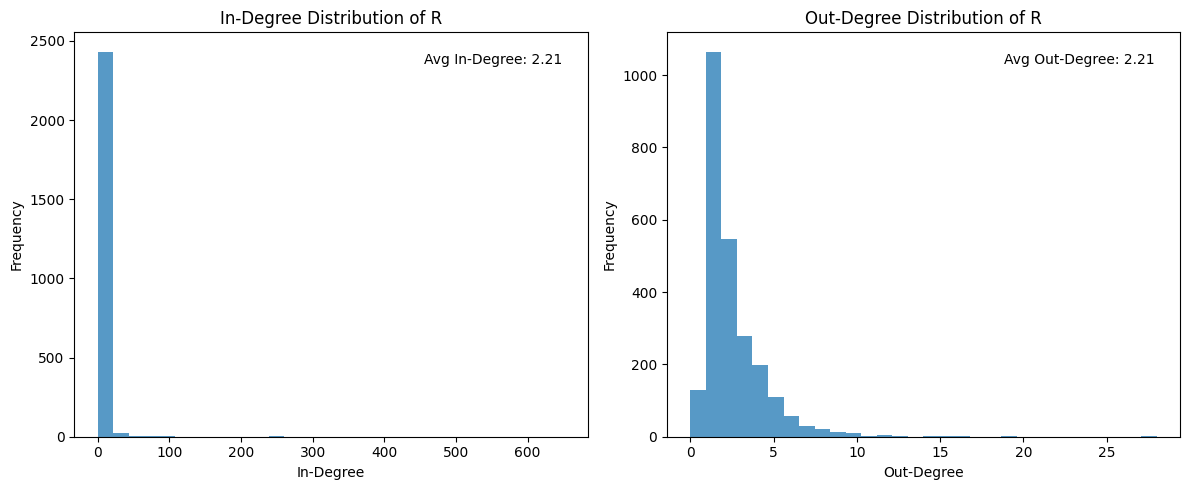

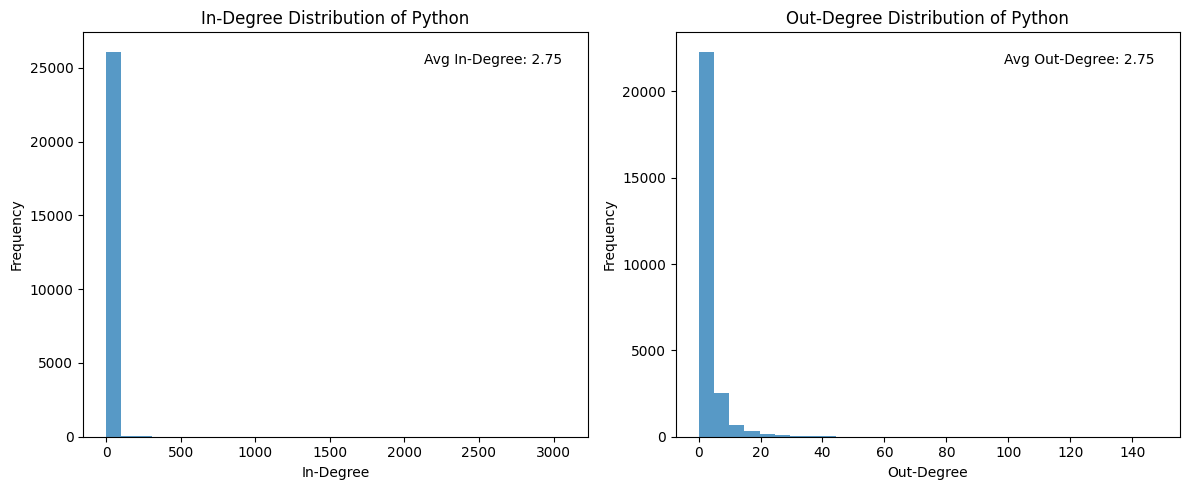

In [ ]:
degree_distribution(G_java,'JAVA')
degree_distribution(G_r,'R')
degree_distribution(G_python,'Python')

## degree distribution log-log

In [ ]:
#probaility density of degrees
def degree_distribution_log(G,language):
    # Get in-degree and out-degree sequences
    in_degree_sequence = [d for n, d in G.in_degree()]
    out_degree_sequence = [d for n, d in G.out_degree()]

    # Remove zeros to avoid log(0) error
    in_degree_sequence = [d for d in in_degree_sequence if d > 0]
    out_degree_sequence = [d for d in out_degree_sequence if d > 0]

    plt.figure(figsize=(12, 5))

    # In-degree distribution on log-log scale
    plt.subplot(1, 2, 1)
    plt.hist(in_degree_sequence, bins=np.logspace(np.log10(min(in_degree_sequence)), np.log10(max(in_degree_sequence)), 30), alpha=0.75)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("In-Degree k")
    plt.ylabel("p(k)")
    plt.title(f"In-Degree Distribution (Log-Log Scale)  of {language}")

    # Out-degree distribution on log-log scale
    plt.subplot(1, 2, 2)
    plt.hist(out_degree_sequence, bins=np.logspace(np.log10(min(out_degree_sequence)), np.log10(max(out_degree_sequence)), 30), alpha=0.75)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Out-Degree k")
    plt.ylabel("p(k)")
    plt.title(f"Out-Degree Distribution (Log-Log Scale)  of {language}")

    plt.tight_layout()
    plt.show()

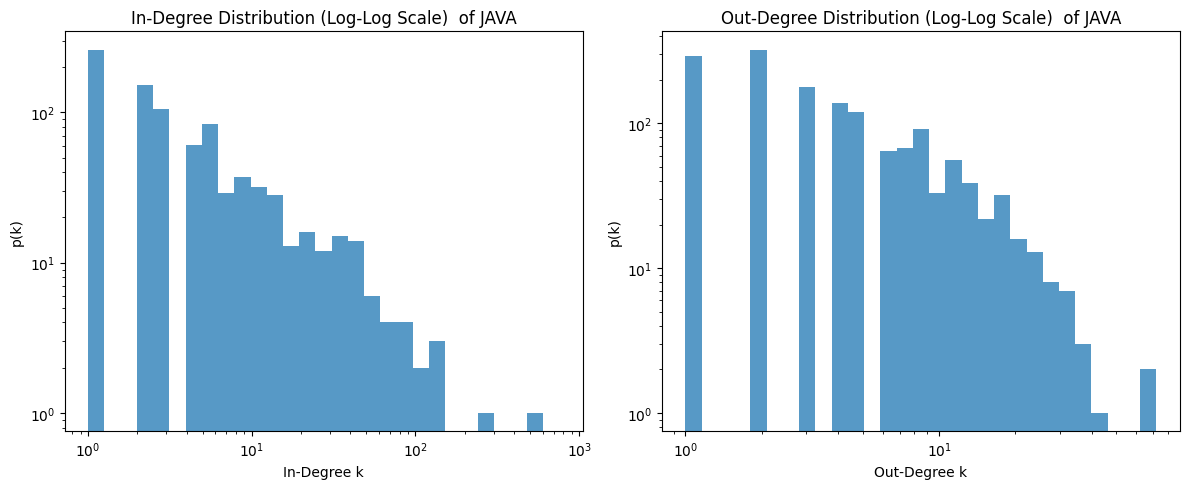

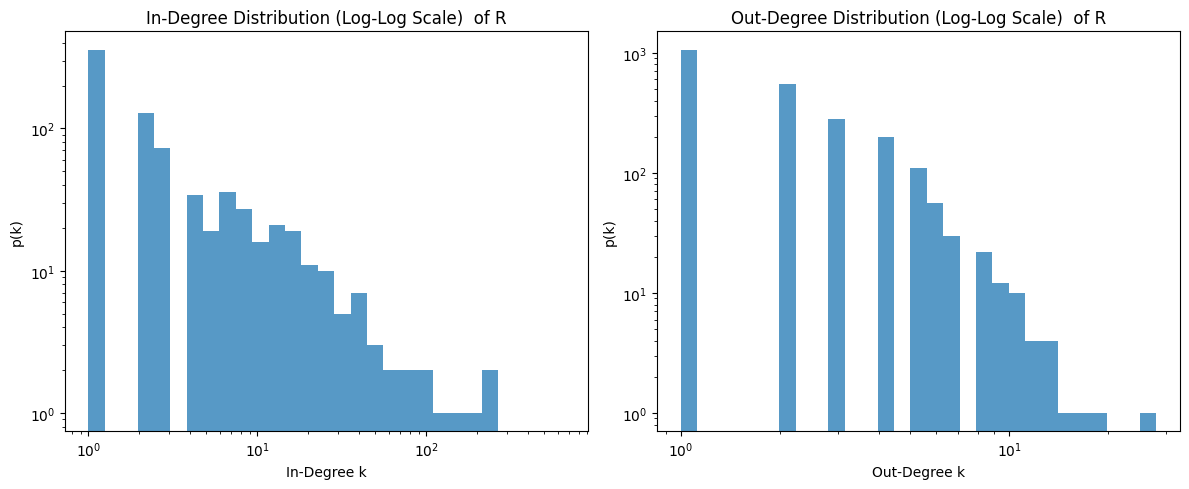

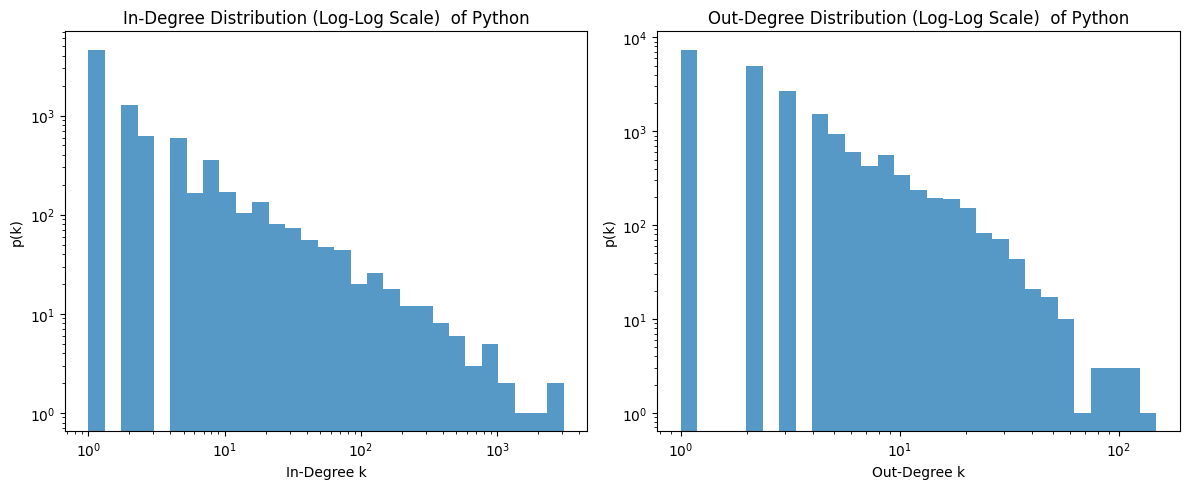

In [ ]:
degree_distribution_log(G_java,'JAVA')
degree_distribution_log(G_r,'R')
degree_distribution_log(G_python,'Python')

## assortativity

In [ ]:
def assortativity(G,language):
    # Calculate the in-degree and out-degree of each node
    in_degree_sequence = dict(G.in_degree())
    out_degree_sequence = dict(G.out_degree())

    # Compute the average neighbor in-degree and out-degree of each node
    avg_neighbor_in_degree = nx.average_neighbor_degree(G, source='in', target='in')
    avg_neighbor_out_degree = nx.average_neighbor_degree(G, source='out', target='out')

    # Group by degree to compute knn(k) as a function of degree
    in_degree_knn = {}
    out_degree_knn = {}

   # In-degree assortativity (knn for in-degrees)
    for node, in_degree in in_degree_sequence.items():
        if in_degree not in in_degree_knn:
            in_degree_knn[in_degree] = []
        in_degree_knn[in_degree].append(avg_neighbor_in_degree[node])

    # Out-degree assortativity (knn for out-degrees)
    for node, out_degree in out_degree_sequence.items():
        if out_degree not in out_degree_knn:
            out_degree_knn[out_degree] = []
        out_degree_knn[out_degree].append(avg_neighbor_out_degree[node])

    # Calculate the average knn(k) for each in-degree and out-degree
    in_degrees = sorted(in_degree_knn.keys())
    out_degrees = sorted(out_degree_knn.keys())

    in_knn_values = [np.mean(in_degree_knn[degree]) for degree in in_degrees]
    out_knn_values = [np.mean(out_degree_knn[degree]) for degree in out_degrees]

    # Assortativity coefficients for in-degree and out-degree
    assor_in = nx.degree_assortativity_coefficient(G, x='in', y='in')
    assor_out = nx.degree_assortativity_coefficient(G, x='out', y='out')


    # In-degree assortativity plot
    plt.subplot(1, 2, 1)
    plt.plot(in_degrees, in_knn_values, 'o', color='C1', label=f"In-Degree $r_{{og}}$ = {assor_in:.3f}")

    plt.xlabel("$k_{in}$")
    plt.ylabel("$k_{nn}(k_{in})$")
    plt.title(f"In-Degree Assortativity for {language}")
    plt.legend()

    # Out-degree assortativity plot
    plt.subplot(1, 2, 2)
    plt.plot(out_degrees, out_knn_values, 'o', color='C1', label=f"Out-Degree $r_{{og}}$ = {assor_out:.3f}")
    plt.xlabel("$k_{out}$")
    plt.ylabel("$k_{nn}(k_{out})$")
    plt.title(f"Out-Degree Assortativity for {language}")
    plt.legend()

    plt.tight_layout()
    plt.show()

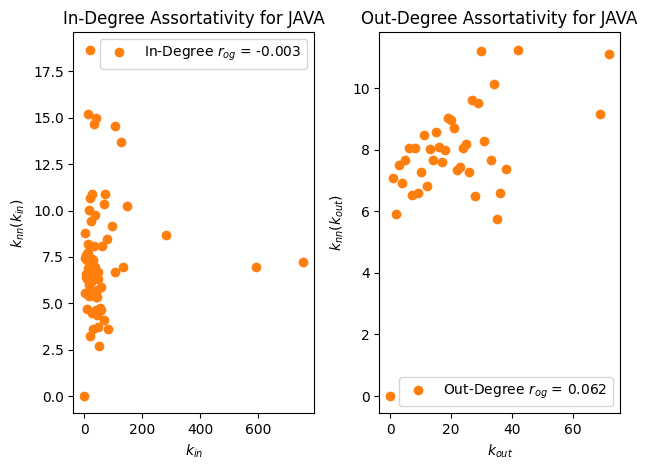

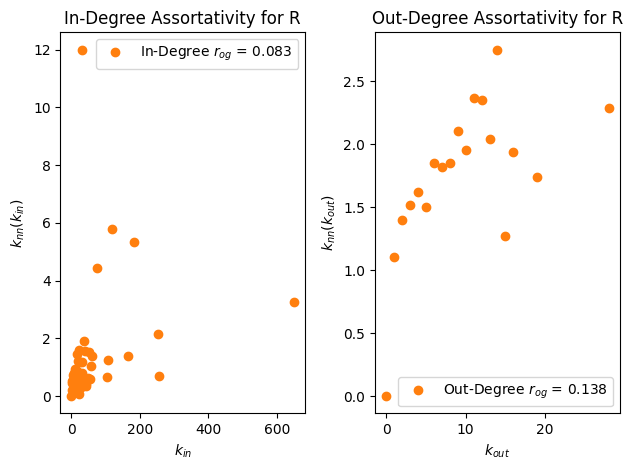

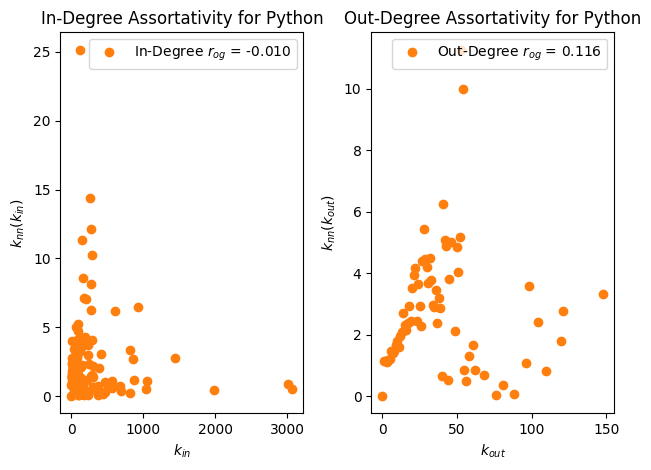

In [ ]:
assortativity(G_java,'JAVA')
assortativity(G_r,'R')
assortativity(G_python,'Python')

## community detection

In [ ]:
# Detect communities using greedy modularity maximization algorithm
def detect_communities_greedy(G):
    communities = list(nx.community.greedy_modularity_communities(G))
    return communities

communities_greedy_p = detect_communities_greedy(G_python)
print(f"Number of communities detected: {len(communities_greedy_p)}")
communities_greedy_j = detect_communities_greedy(G_java)
print(f"Number of communities detected: {len(communities_greedy_j)}")

Number of communities detected: 643
Number of communities detected: 13


In [ ]:
# Detect communities using louvain method
def visualize_communities(G_r, k=2.0, figsize=(15, 10), title = "Community Network Structure",constant_size=1):
    communities = list(nx.community.louvain_communities(G_r, seed=123))
    print(f"Number of communities detected: {len(communities)}")

    G_community = nx.Graph()
    G_community.add_nodes_from(range(len(communities)))

    edge_weights = {}
    for i, comm1 in enumerate(communities):
        for j in range(i + 1, len(communities)):
            weight = sum(1 for n1 in comm1 for n2 in communities[j] if G_r.has_edge(n1, n2))
            if weight > 0:
                edge_weights[(i, j)] = weight
                G_community.add_edge(i, j, weight=weight)

    pos = nx.kamada_kawai_layout(G_community)

    plt.figure(figsize=figsize)

    community_sizes = [len(comm) for comm in communities]
    max_size = max(community_sizes)
    node_sizes = [2000 * (size / max_size) + 500 for size in community_sizes]

    if edge_weights:
        max_weight = max(edge_weights.values())
        edge_widths = [1.5 * G_community[u][v]['weight']/max_weight for u, v in G_community.edges()]
        nx.draw_networkx_edges(G_community, pos, width=edge_widths, alpha=0.5)

    nodes = nx.draw_networkx_nodes(
        G_community,
        pos,
        node_size=node_sizes,
        node_color=community_sizes,
        cmap=plt.cm.Purples,
        #cmap=plt.cm.viridis_r,
        alpha=0.7
    )

    # Create labels with community sizes
    labels = {i: str(len(comm)) for i, comm in enumerate(communities)}
    #labels = {i: f"{len(comm) / constant_size:.2f}" for i, comm in enumerate(communities)}
    nx.draw_networkx_labels(G_community, pos, labels, font_size=10)

    plt.colorbar(nodes, label='Community Size')
    plt.title(title)
    plt.axis('off')
    plt.margins(0.2)
    plt.tight_layout()
    plt.show()

Number of communities detected: 37


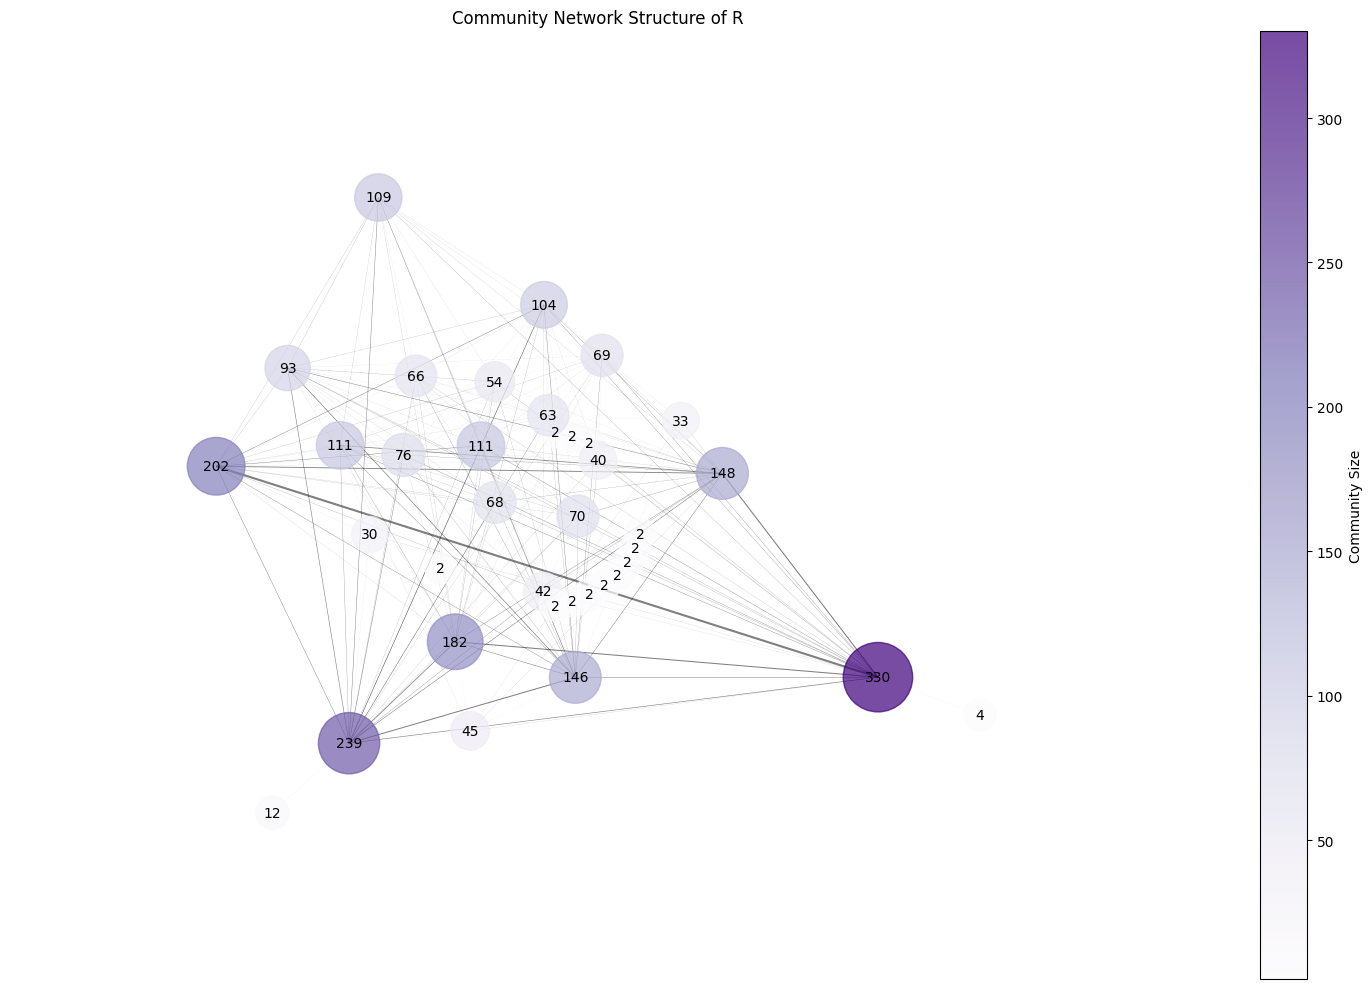

Number of communities detected: 15


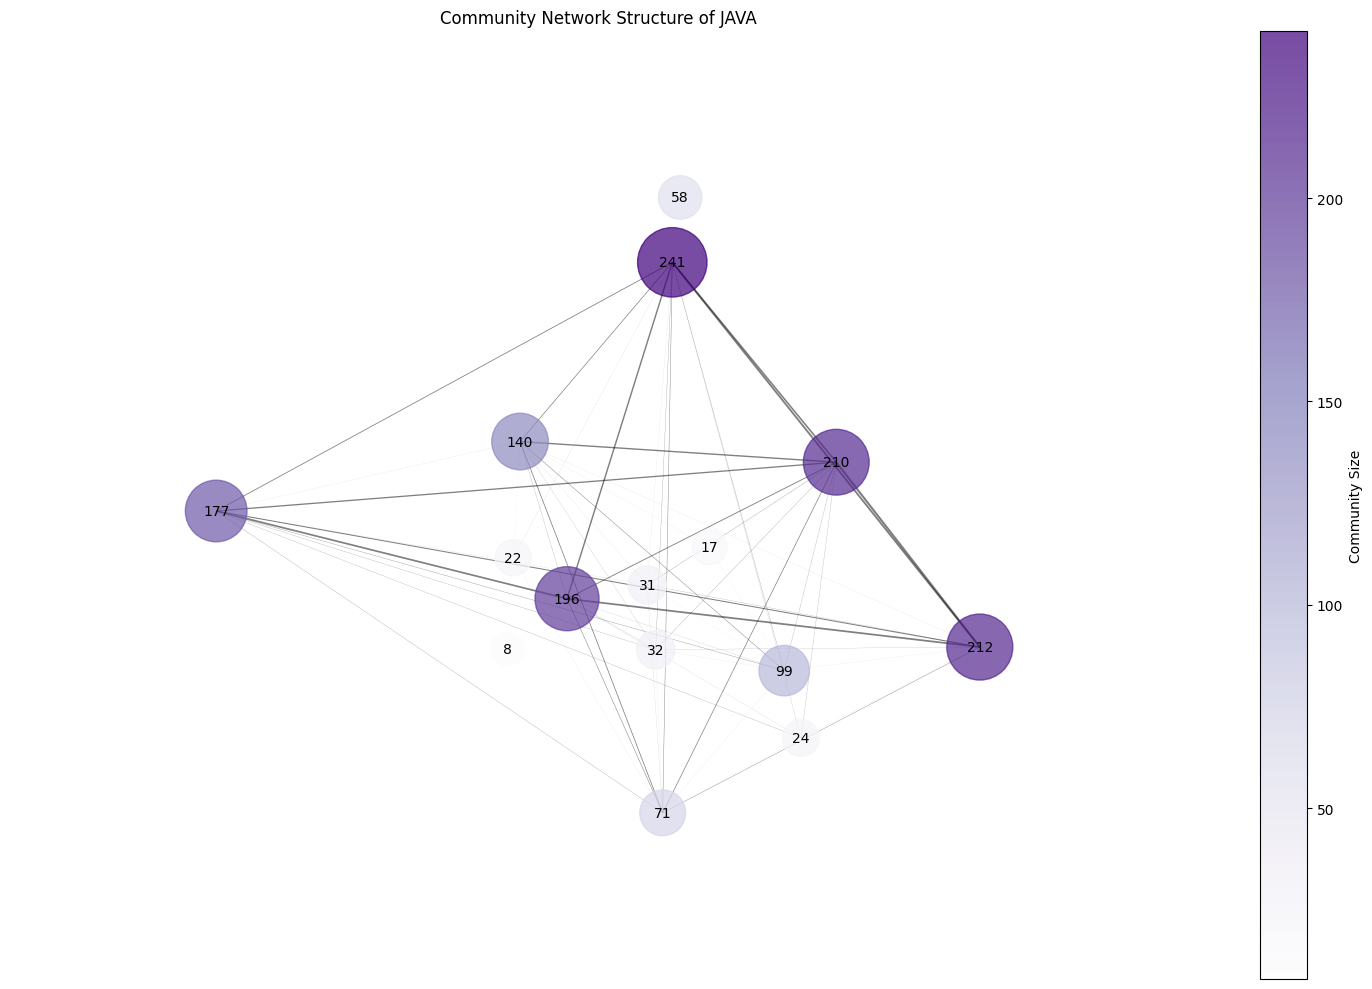

Number of communities detected: 450


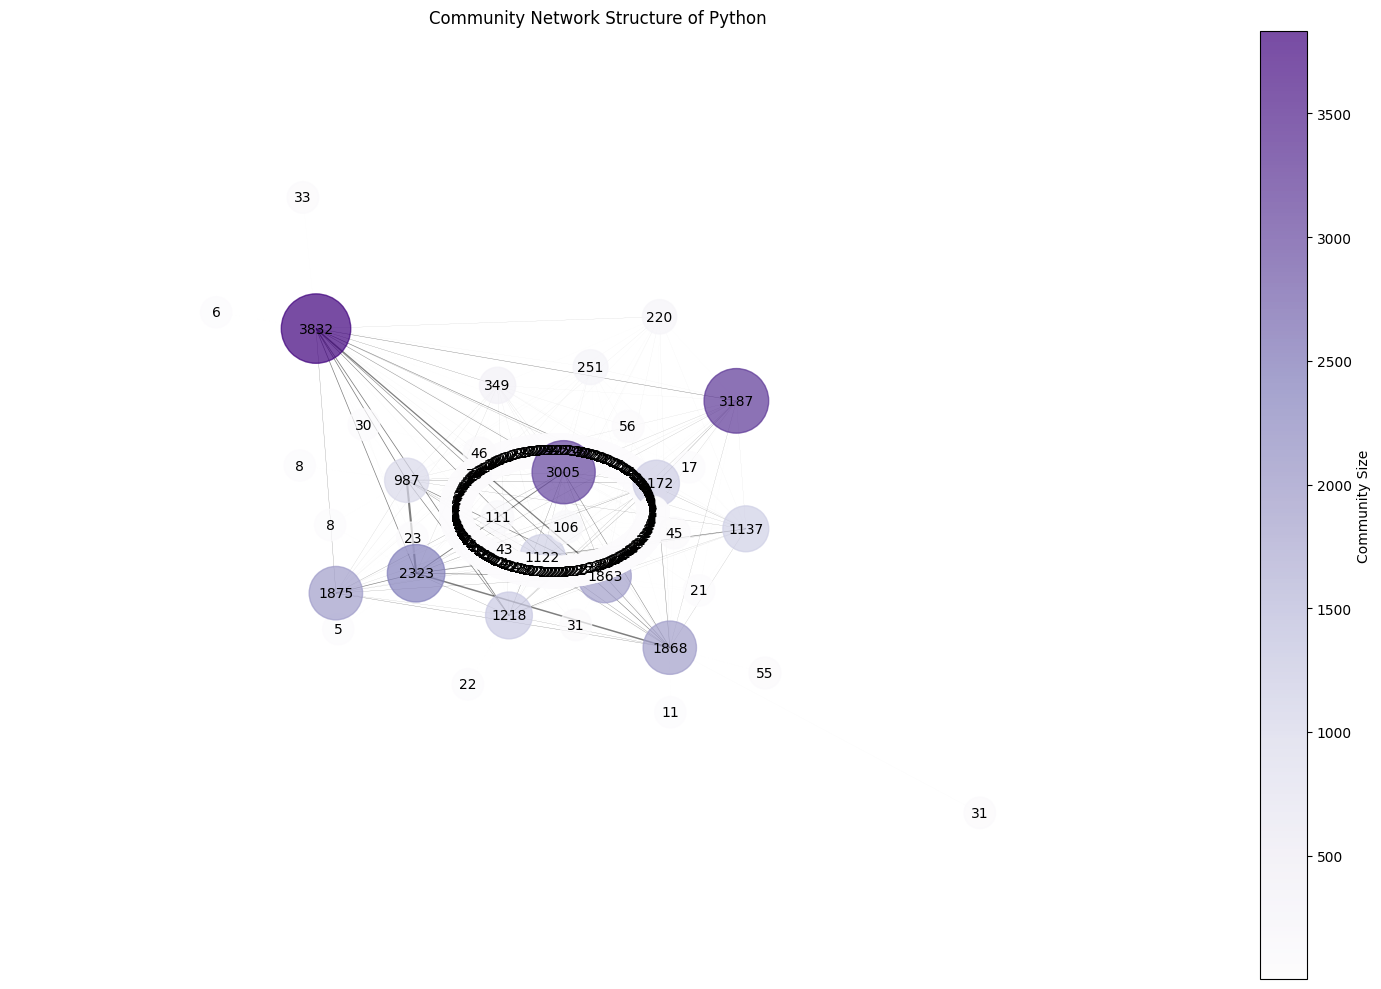

In [ ]:
visualize_communities(G_r,title ="Community Network Structure of R" )
visualize_communities(G_java,title ="Community Network Structure of JAVA" )
visualize_communities(G_python,title ="Community Network Structure of Python" )

# Random Attack

In [ ]:

# Calculate the size of the largest connected component
def largest_connected_component_size(graph):
    if graph.number_of_nodes() == 0:
        return 0
    # Use weakly_connected_components for directed graphs
    return len(max(nx.weakly_connected_components(graph), key=len))

# Perform attack on nodes in the graph
def perform_attack(graph, attack_type="random"):
    graph_copy = graph.copy()
    initial_lcc_size = largest_connected_component_size(graph_copy)
    if initial_lcc_size == 0:
        return [], []  # Return empty lists if the graph is empty

    # Get list of nodes
    elements = list(graph.nodes())

    # Shuffle elements for random attack
    if attack_type == "random":
        random.shuffle(elements)

    # Initialize results arrays
    steps = np.linspace(0, len(elements), num=50, dtype=int)
    lcc_sizes = []
    removed_fractions = []

    # Perform attack
    removed = 0
    for step in steps:
        # Remove nodes until we reach current step
        while removed < step:
            node = elements[removed]
            if node in graph_copy:
                graph_copy.remove_node(node)
            removed += 1

        # Calculate metrics
        lcc_size = largest_connected_component_size(graph_copy)
        lcc_sizes.append(lcc_size / initial_lcc_size)  # Normalize by original size
        removed_fractions.append(removed / len(elements))

    return removed_fractions, lcc_sizes

# Plot the resilience of multiple networks
def plot_network_resilience(networks):
    attack_type = "random"
    color_cycle = plt.cm.tab10.colors  # Use a colormap for distinct colors
    plt.figure(figsize=(12, 8))

    for i, (name, graph) in enumerate(networks.items()):
        x, y = perform_attack(graph, attack_type=attack_type)
        plt.plot(x, y, label=f"{name} ({attack_type.capitalize()} Attack)",
                 color=color_cycle[i % len(color_cycle)], marker="o", markevery=0.1)

    plt.xlabel("Fraction of Nodes Removed")
    plt.ylabel("Relative Size of LCC")
    plt.title("Network Resilience Under Node Attack")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

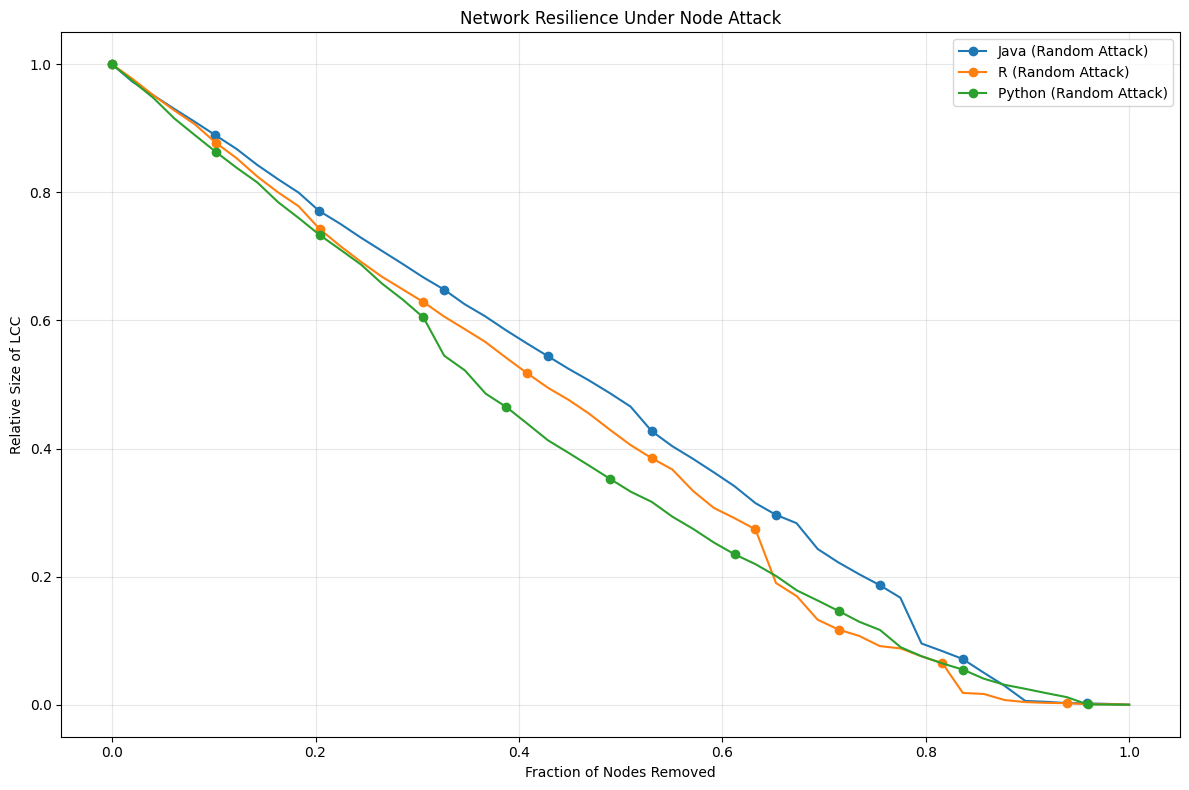

In [ ]:
plot_network_resilience(network)